In [1]:
root="/content/drive/MyDrive/Mental_health"

In [2]:
import os
os.chdir(root)

In [3]:
!ls

 data_mixed.csv       gold_corpus.csv		  Suicide_Detection.csv
 data_mixed_dep.csv   gold_corpus_rt.csv	  Suicide.ipynb
 data_mixed_rt.csv    NEW_DATA.csv		  test2Data.csv
 depression.csv      'Preprocessing data.ipynb'   train2Data.csv
 dummy_data.csv       Suicide+depression.ipynb


In [1]:
import pandas as pd
import numpy as np

In [70]:
data=pd.read_csv("Suicide_Detection.csv")
data

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [71]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data.dropna(inplace=True)
data

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...
232069,If you don't like rock then your not going to ...,non-suicide
232070,You how you can tell i have so many friends an...,non-suicide
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,The usual stuff you find hereI'm not posting t...,suicide


In [72]:
!pip install tweet-preprocessor

In [73]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import preprocessor as p
from nltk.stem import WordNetLemmatizer 
from nltk import sent_tokenize
from nltk import word_tokenize

stop_words = stopwords.words()

def cleaning(text):        
    
    text = re.sub(r"won't", "will not",text)
    text = re.sub(r"can\'t", "can not",text)
    text = re.sub(r"n\'t", " not",text)
    text = re.sub(r"\'re", " are",text)
    text = re.sub(r"\'s", " is",text)
    text = re.sub(r"\'d", " would",text)
    text = re.sub(r"\'ll", " will",text)
    text = re.sub(r"\'t", " not",text)
    text = re.sub(r"\'ve", " have",text)
    text = re.sub(r"\'m", " am",text)
    text = re.sub('RT'," ", text)
    
    text=p.clean(text)
    text = re.sub("\$RESERVED\$ \$MENTION\$|\$NUMBER\$|\$MENTION\$",' ', text)
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('[’“”…]', ' ', text)   
    
    
    text = re.sub('user'," ", text)
    text = re.sub('url'," ", text)
    
    text = re.sub('reserved'," ", text)
    
    
    
    
    
    
    text = re.sub("[^A-Za-z]",' ',text)
    

    # removing the emojies               
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r' ', text)   
    
    
    
    
    
    
    return text



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ravitiwari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ravitiwari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
k=np.random.randint(0,len(data),(10000))
data1=data.loc[k]
data1['class'].value_counts()

non-suicide    5016
suicide        4984
Name: class, dtype: int64

In [75]:
data1.text=data1.text.apply(cleaning)
data1.dropna(inplace=True)
data1.shape

(10000, 2)

In [76]:
mask=data1['class']=='suicide'
data6=data1.loc[mask]
data6.dropna(inplace=True)
data6['class'].value_counts()

/var/folders/lv/5qnxdk2j3j9g91klk8lph5400000gn/T/ipykernel_6203/4280674246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6.dropna(inplace=True)


suicide    4984
Name: class, dtype: int64

In [77]:
data2=pd.read_csv("depression.csv")
data2

,Unnamed: 0,tweet,label
0,0,damn taking this personality quiz and realizin...,4
1,1,remember experiencing as kid what now realize ...,4
2,2,damn louis really did pull me out of my depres...,4
3,3,my depression is really kicking my ass right n...,4
4,4,feel like my night is going bad family calling...,4
...,...,...,...
61995,30995,the only way they can attract good dicks is to...,2
61996,30996,gotta say like you think we have the same atti...,2
61997,30997,many product companies goes from right to left...,2
61998,30998,just casually playing animal crossing while wa...,2


In [78]:
data2.drop("Unnamed: 0",axis=1,inplace=True)
data2

,tweet,label
0,damn taking this personality quiz and realizin...,4
1,remember experiencing as kid what now realize ...,4
2,damn louis really did pull me out of my depres...,4
3,my depression is really kicking my ass right n...,4
4,feel like my night is going bad family calling...,4
...,...,...
61995,the only way they can attract good dicks is to...,2
61996,gotta say like you think we have the same atti...,2
61997,many product companies goes from right to left...,2
61998,just casually playing animal crossing while wa...,2


In [79]:
mask=data2.label==4
data2=data2.loc[mask]
data2

,tweet,label
0,damn taking this personality quiz and realizin...,4
1,remember experiencing as kid what now realize ...,4
2,damn louis really did pull me out of my depres...,4
3,my depression is really kicking my ass right n...,4
4,feel like my night is going bad family calling...,4
...,...,...
46995,love that this is your life paul railing again...,4
46996,all see now why fucking hate cops they are mon...,4
46997,this really just breaks my heart on so many le...,4
46998,currently doing this now and relieved but also...,4


In [80]:
data2.label='depression'
data2

/Users/ravitiwari/miniforge3/envs/tf/lib/python3.9/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,tweet,label
0,damn taking this personality quiz and realizin...,depression
1,remember experiencing as kid what now realize ...,depression
2,damn louis really did pull me out of my depres...,depression
3,my depression is really kicking my ass right n...,depression
4,feel like my night is going bad family calling...,depression
...,...,...
46995,love that this is your life paul railing again...,depression
46996,all see now why fucking hate cops they are mon...,depression
46997,this really just breaks my heart on so many le...,depression
46998,currently doing this now and relieved but also...,depression


In [81]:
k=np.random.randint(0,len(data2),(10000))
data2=data2.iloc[k]
data2

,tweet,label
42123,feel like don take enough time to give credit ...,depression
4943,oh this is such fantasy for me and have no ide...,depression
42849,can donate but suffer from severe depression a...,depression
4656,kids start crying and parents cave and they ge...,depression
43496,if you hurt restaurant partner god see everyth...,depression
...,...,...
14819,don get me wrong kids need to be safe but abso...,depression
6807,want to scream and cry and be held want cry ou...,depression
46989,have found my inner peace and it taken me week...,depression
5186,when said its been long time didnt cry got str...,depression


In [82]:
data2.label.value_counts()

depression    10000
Name: label, dtype: int64

In [83]:
data3=pd.read_csv("data_mixed_rt.csv")
data3

,Unnamed: 0,tweet,label
0,0,conservatives are excellent at running up debt...,2
1,1,great example as an immigrant and woman ceo i...,2
2,2,fuckhead for awhile i open two stores for...,2
3,3,i just cracked my motherfuckin phone god damn ...,1
4,4,i could never have a bby by a lil dick thts...,1
...,...,...,...
49517,49524,aye and when the hoes start coming do not ...,1
49518,49525,kevin williamson is excellent piece on why e...,2
49519,49526,in an age where progressives demand full ...,2
49520,49527,all dirty vote bank politics aap rule has mad...,0


In [84]:
data3.drop("Unnamed: 0",axis=1,inplace=True)
data3.rename(columns={'text':'tweet'},inplace=True)
data3

,tweet,label
0,conservatives are excellent at running up debt...,2
1,great example as an immigrant and woman ceo i...,2
2,fuckhead for awhile i open two stores for...,2
3,i just cracked my motherfuckin phone god damn ...,1
4,i could never have a bby by a lil dick thts...,1
...,...,...
49517,aye and when the hoes start coming do not ...,1
49518,kevin williamson is excellent piece on why e...,2
49519,in an age where progressives demand full ...,2
49520,all dirty vote bank politics aap rule has mad...,0


In [85]:
mask=data3.label==2
data3=data3.loc[mask]
data3

,tweet,label
0,conservatives are excellent at running up debt...,2
1,great example as an immigrant and woman ceo i...,2
2,fuckhead for awhile i open two stores for...,2
5,what a hateful spiteful self righteous self...,2
6,as thousands flee violence in nicaragua un re...,2
...,...,...
49512,avoid this movie un american,2
49515,you knowmandni know you are on the verge from ...,2
49518,kevin williamson is excellent piece on why e...,2
49519,in an age where progressives demand full ...,2


In [21]:
data4=pd.read_csv('gold_corpus_rt.csv')
data4

,Unnamed: 0,tweet,label
0,0,gameday fan ejected from kyle field for va...,3
1,1,what is your stance on vaping,3
2,2,nicotine stans are getting brave,3
3,3,pulse x bf kit l by tony b and vandy vape l a...,3
4,4,fda takes s of documents from juul e cig m...,3
...,...,...,...
2111,2111,you are my nicotine heroine novocaine fvck ...,3
2112,2112,maybe but that would be as the assistant smo...,3
2113,2113,jasmine star star theyre smoking outside y...,3
2114,2114,think you can smoke or vape cannabis anywhe...,3


In [22]:
data4.drop("Unnamed: 0",axis=1,inplace=True)
data4.label='smoking'
data4

,tweet,label
0,gameday fan ejected from kyle field for va...,smoking
1,what is your stance on vaping,smoking
2,nicotine stans are getting brave,smoking
3,pulse x bf kit l by tony b and vandy vape l a...,smoking
4,fda takes s of documents from juul e cig m...,smoking
...,...,...
2111,you are my nicotine heroine novocaine fvck ...,smoking
2112,maybe but that would be as the assistant smo...,smoking
2113,jasmine star star theyre smoking outside y...,smoking
2114,think you can smoke or vape cannabis anywhe...,smoking


In [86]:
data3.label='normal'
data3

/Users/ravitiwari/miniforge3/envs/tf/lib/python3.9/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,tweet,label
0,conservatives are excellent at running up debt...,normal
1,great example as an immigrant and woman ceo i...,normal
2,fuckhead for awhile i open two stores for...,normal
5,what a hateful spiteful self righteous self...,normal
6,as thousands flee violence in nicaragua un re...,normal
...,...,...
49512,avoid this movie un american,normal
49515,you knowmandni know you are on the verge from ...,normal
49518,kevin williamson is excellent piece on why e...,normal
49519,in an age where progressives demand full ...,normal


In [87]:
data6.rename(columns={'text':'tweet',"class":'label'},inplace=True)

/Users/ravitiwari/miniforge3/envs/tf/lib/python3.9/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [88]:
new_data=pd.concat([data6,data2,data3])
new_data.dropna(inplace=True)
new_data.label.value_counts()

normal        19658
depression    10000
suicide        4984
Name: label, dtype: int64

In [89]:
new_data.to_csv("NEW_DATA_RT.csv")

In [55]:
new_data.label.value_counts()

normal        19658
depression     8000
suicide        4385
Name: label, dtype: int64

In [22]:
y=new_data['label']
x=new_data['tweet']

In [23]:
dummy_data=pd.read_csv("dummy_data.csv")
dummy_data

,Unnamed: 0,text,label
0,616,he is here every one on council is here,normal
1,460,how many women commited jouhar to avoid rape a...,normal
2,372,well you are dumped,normal
3,287,could you guys go say hey to this guy for me...,suicide
4,136,depression is the inability to construct a fut...,depression
...,...,...,...
615,584,bitch you are so brave and smart and hysterica...,normal
616,219,im almost done i posted on here months ago say...,suicide
617,394,says he is the best tx he is for ending open b...,normal
618,18,the perfect is the enemy of the good,depression


In [24]:
dummy_data.drop("Unnamed: 0",axis=1,inplace=True)
dummy_data.dropna(inplace=True)
dummy_data_test=dummy_data['text']
dummy_data_label=dummy_data['label']

In [25]:
dummy_data.label.value_counts()

normal        297
depression    171
suicide       151
Name: label, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y)
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train)

print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)

print(X_test.shape, y_test.shape)


(27762,) (27762,)
(6941,) (6941,)


In [27]:
d={}
for i in y_test:
  if i in d:
    d[i]+=1
  else:
    d[i]=1

In [28]:
print(d)

{'normal': 3932, 'depression': 2000, 'suicide': 1009}


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB


In [56]:
import tensorflow as tf
import tensorflow_hub as hub

In [57]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(text):
    return model(text)

2021-11-16 19:44:50.023506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-16 19:44:50.767137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [32]:
X_train_tweet = embed(list(X_train))
#X_cv_tweet = embed(list(X_cv))

X_test_tweet = embed(list(X_test))

print("After Embedding vectorizations")
print(X_train_tweet.shape, y_train.shape)
#print(X_cv_tweet.shape, y_cv.shape)
print(X_test_tweet.shape, y_test.shape)
print("="*100)

2021-11-16 19:14:44.973512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


After Embedding vectorizations
(27762, 512) (27762,)
(6941, 512) (6941,)


In [33]:
dummy_test = embed(list(dummy_data_test))

print(dummy_test.shape)
print("="*100)

(619, 512)


In [34]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import joblib
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

In [35]:
def train_test_model(model, X_train, X_test, y_train, y_test,labels):
    print('Start training...', end='')
    model.fit(X_train, y_train)
    print('done!')
    print("="*80)
    print('Start testing...', end='')
    predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    metrics_report = classification_report(y_test, predictions, target_names=labels)
    precision, recall, fscore, train_support = score(y_test, predictions, average='weighted')
    print('done!')
    print("="*80)
    return predictions, accuracy, metrics_report, (precision, recall, fscore)

In [90]:
labels_=['Depression','Normal','Smoking']

Start training...done!
Start testing...done!
accuracy: 0.5664889785333526
              precision    recall  f1-score   support

  Depression       0.00      0.00      0.00      2000
      Normal       0.57      1.00      0.72      3932
     Smoking       0.00      0.00      0.00      1009

    accuracy                           0.57      6941
   macro avg       0.19      0.33      0.24      6941
weighted avg       0.32      0.57      0.41      6941



/Users/ravitiwari/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ravitiwari/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ravitiwari/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

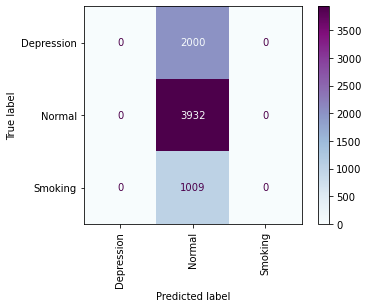

In [91]:
log_model=LogisticRegression(penalty='l2',max_iter=1000)
predictions, accuracy, metrics_report, log_prf = train_test_model(log_model, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(log_model, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
accuracy: 0.9685414680648237
              precision    recall  f1-score   support

  Depression       0.96      0.98      0.97      2000
      Normal       0.98      0.98      0.98      3932
     Smoking       0.94      0.94      0.94       423
     Suicide       0.98      0.93      0.95       988

    accuracy                           0.97      7343
   macro avg       0.96      0.95      0.96      7343
weighted avg       0.97      0.97      0.97      7343



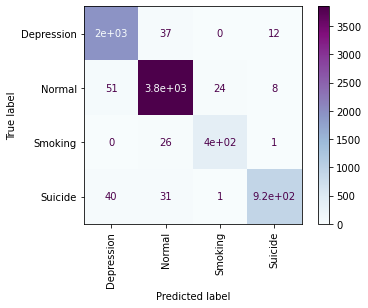

In [43]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)

predictions, accuracy, metrics_report, svm_prf = train_test_model(svm, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(svm, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

In [47]:
def train_test_model(model, X_train, X_test, y_train, y_test,labels):
    print('Start training...', end='')
    model.fit(X_train, y_train)
    print('done!')
    print("="*80)
    print('Start testing...', end='')
    predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    metrics_report = classification_report(y_test, predictions, target_names=labels)
    precision, recall, fscore, train_support = score(y_test, predictions, average='weighted')
    print('done!')
    print("="*80)
    return predictions, accuracy, metrics_report, (precision, recall, fscore)

Start training...done!
Start testing...done!
accuracy: 0.8546042003231018
              precision    recall  f1-score   support

  Depression       0.92      0.54      0.68       171
      Normal       0.85      0.99      0.92       297
     Smoking       0.00      0.00      0.00         0
     Suicide       0.83      0.94      0.88       151

    accuracy                           0.85       619
   macro avg       0.65      0.62      0.62       619
weighted avg       0.87      0.85      0.84       619



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


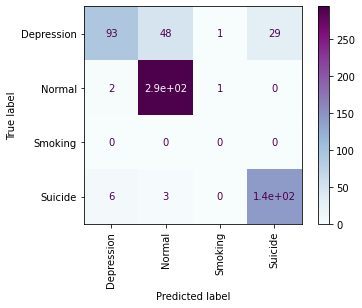

In [48]:
log_model=LogisticRegression(penalty='l2',max_iter=1000)
predictions, accuracy, metrics_report, log_prf = train_test_model(log_model, X_train_tweet, dummy_test, y_train, dummy_data_label, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(log_model, dummy_test, dummy_data_label, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
accuracy: 0.8546042003231018
              precision    recall  f1-score   support

  Depression       0.91      0.57      0.70       171
      Normal       0.86      0.98      0.92       297
     Smoking       0.00      0.00      0.00         0
     Suicide       0.83      0.94      0.88       151

    accuracy                           0.85       619
   macro avg       0.65      0.62      0.62       619
weighted avg       0.87      0.85      0.85       619



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


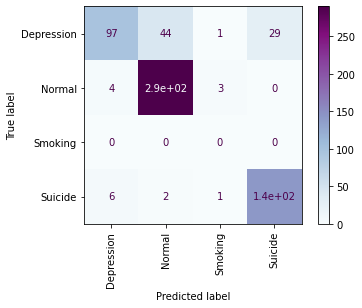

In [49]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)

predictions, accuracy, metrics_report, svm_prf = train_test_model(svm, X_train_tweet,dummy_test, y_train, dummy_data_label, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(svm, dummy_test, dummy_data_label, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

In [59]:
k="i fucking want to die"

l=embed(list(k))

In [63]:
list(k)

['i',
 ' ',
 'f',
 'u',
 'c',
 'k',
 'i',
 'n',
 'g',
 ' ',
 'w',
 'a',
 'n',
 't',
 ' ',
 't',
 'o',
 ' ',
 'd',
 'i',
 'e']

In [64]:
list(X_train)

['actually i do think women should be reclaiming  cunt   it is past time ',
 '  great weather to hit up the slopes this weekend     amp  open saturday  ht  ',
 'i have no idea how to deal with my best friend is suicidal thoughts anymorerecently  i have been really overwhelmed with my best friend  i always knew she had clinical depression and thoughts about suicide  but now it gets too much for me i am an almost years old girl and she is   i can not do much except write with her  because she lives     km away in another state  i feel so powerless  because i can not go to her and just give her a hug   but i gave my best and always stayed by her side  even if it is via social media  the last days  something was a bit different  yesterday and today  she blocked me on all social media to  protect me   she also blocked every other contact  she never reacted like that  even at her worst times  some months ago  when she also wanted to commit suicide  she did not block me and talked with me at 

In [66]:
li=[]
li.append(input())

i fucking want bto die


In [67]:
li

['i fucking want bto die']

In [68]:
j=embed(li)

In [69]:
j.shape

TensorShape([1, 512])